**Importing Libraries**

In [5]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

**Load the Dataset**

In [6]:
x = 'weather_data.csv'

df = pd.read_csv(x)



**Inspect the Dataset**

In [7]:
# Display the first 5 rows of the Dataset

print(df.head())



   ghi  dhi  precip        timestamp_utc  temp  app_temp  dni  snow_depth  \
0    0    0     0.0  2025-01-15T12:00:00  25.9      18.7    0           0   
1  385   87     0.0  2025-01-15T15:00:00  29.3      22.8  748           0   
2  542  101     0.0  2025-01-15T18:00:00  36.5      32.0  831           0   
3  193   65     0.0  2025-01-15T21:00:00  38.3      35.6  581           0   
4    0    0     0.0  2025-01-16T00:00:00  29.3      27.5    0           0   

  wind_cdir  rh  ... clouds_mid  wind_dir  snow  clouds_low  solar_rad  \
0       NNW  51  ...          0       350     0           0    0.00000   
1       NNW  41  ...          0       360     0           0  384.62994   
2       NNW  30  ...          0       340     0           0  542.37920   
3        NW  28  ...          0       310     0           0  192.98000   
4         W  46  ...          0       280     0           0    0.00000   

   wind_gust_spd      timestamp_local description(output)  code  icon  
0           11.9  20

In [8]:
# Find the general information of each column

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     object 
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     object 
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     object 
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

**Feature Engineering**

**1. Create a new column called "Feels Like Temperature"**

In [9]:
# FeelsLike=Temperature−(WindSpeed×0.2)

df['Feels Like Temperature'] = df['temp'] - (df['wind_spd'] * 2)

print(df[['temp', 'wind_spd', 'Feels Like Temperature']].head())



   temp  wind_spd  Feels Like Temperature
0  25.9       6.3                    13.3
1  29.3       6.3                    16.7
2  36.5       5.4                    25.7
3  38.3       3.6                    31.1
4  29.3       0.0                    29.3


**2. Detect and handle outliers in Temperature, Humidity, and Pressure using the IQR method**

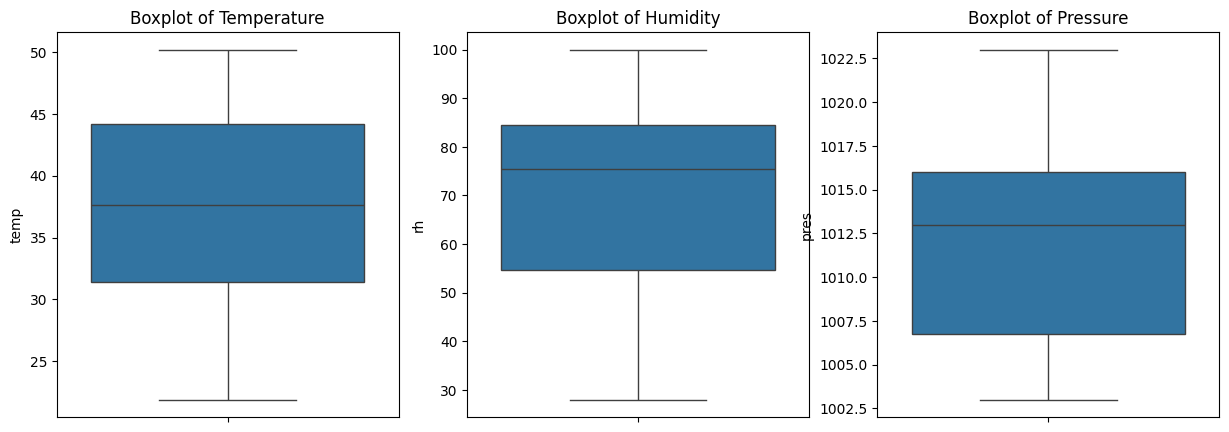

In [ ]:
# Plot a Box Plot to visualize outliers


# Creating a figure with 3 sub-plots
plt.figure(figsize = (15,5))


# Temperature Boxplot

plt.subplot(1,3,1)

plt.title('Boxplot of Temperature')

sns.boxplot(y=df['temp'])


# Humidity Boxplot

plt.subplot(1,3,2)

plt.title('Boxplot of Humidity')

sns.boxplot(y = df['rh'])


# Pressure Boxplot

plt.subplot(1,3,3)

plt.title('Boxplot of Pressure')

sns.boxplot(y = df['pres'])


plt.show()

In [ ]:
# Function to detect and remove outliers using IQR Method

def rem_outlier(df, column):

  Q1 = df[column].quantile(0.25)

  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1


  # Define lower and upper bounds

  lower_b = Q1 - 1.5 * IQR
  upper_b = Q3 + 1.5 * IQR


  # Filter the dataframe keeping only the values within bound

  df_filter = df[(df[column] >= lower_b) & (df[column] <= upper_b)]

  return df_filter


# Apply the function to Temperature, Humidity and Pressure

df_clean = rem_outlier(df, 'temp')

df_clean = rem_outlier(df_clean, 'rh')

df_clean = rem_outlier(df_clean, 'pres')


# Display the summary after removing outliers

print(df_clean[['temp', 'rh', 'pres']].head())



   temp  rh  pres
0  25.9  51  1021
1  29.3  41  1023
2  36.5  30  1020
3  38.3  28  1019
4  29.3  46  1020


**3. Encode Weather Condition into numerical values using Label Encoding or One-Hot Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Create a Label Encoder Object

label_e = LabelEncoder()


# Apply Label Encoding on 'Description' column

df['weather_encoded'] = label_e.fit_transform(df['description(output)'])


# Display the first 5 rows
print(df[['description(output)', 'weather_encoded']].head())


# Display the last 5 rows
print(df[['description(output)', 'weather_encoded']].tail())



  description(output)  weather_encoded
0          Few clouds                3
1           Clear Sky                1
2          Few clouds                3
3           Clear Sky                1
4          Few clouds                3
   description(output)  weather_encoded
35       Broken clouds                0
36       Broken clouds                0
37       Broken clouds                0
38    Scattered clouds                6
39    Scattered clouds                6


**4. Normalize Temperature, Humidity, and Wind Speed using Min-Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Create a MinMaxScaler Object
norm = MinMaxScaler()


# Select columns to normlaize

col_norm = ['temp', 'rh', 'wind_spd']


# Aplly MinMaxScaking

df[col_norm] = norm.fit_transform(df[col_norm])


# Display first 5 rows

print(df[['temp', 'rh', 'wind_spd']].head())



       temp        rh  wind_spd
0  0.141343  0.319444  0.707865
1  0.261484  0.180556  0.707865
2  0.515901  0.027778  0.606742
3  0.579505  0.000000  0.404494
4  0.261484  0.250000  0.000000


**5. Use groupby() to find average temperature per month**

In [ ]:
# Convert Date to DateTIme format

df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d:%H')

# Extract month from the Date column

df['month'] = df['datetime'].dt.month


# Find the average temperature per month

avg_temp = df.groupby('month')['temp'].mean()


print(avg_temp)



month
1    0.540636
Name: temp, dtype: float64


**MACHINE LEARNING**

**Regression Tasks**

**Predict Temperature using features like Humidity, Wind Speed, and Pressure**

**Train models: Linear Regression, Decision Tree, and Random Forest**

**Evaluate models using RMSE and R² score**

**Use feature importance to determine the most significant predictors**

In [10]:
# Importing Libraries

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score




In [13]:
# Defining features 'X' and target 'y'

X = df[['rh', 'pres', 'wind_spd']]

y = df['temp']



In [15]:
# Split data into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [16]:
# Train models


# Linear Regression Model

lr = LinearRegression()

lr.fit(X_train, y_train)


# Decision Tree Regressor Model

dt = DecisionTreeRegressor(random_state = 42)

dt.fit(X_train, y_train)


# Random Forest Regressor Model

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [17]:
# Make predictions


# Predict the Linear Regression Model

y_pred_lr = lr.predict(X_test)


# Predict the Decision Tree Regressor Model

y_pred_dt = dt.predict(X_test)


# Predict the Random Forest Regressor Model

y_pred_rf = rf.predict(X_test)



In [23]:
# Evaluate Models using RMSE and R2 Score

def evaluate_model(model_name, y_true, y_pred):

  rmse = np.sqrt(mean_squared_error(y_true, y_pred))

  r2 = r2_score(y_true, y_pred)


  print(f"{model_name} : RMSE: {rmse} and R2 Score: {r2}")



evaluate_model("Linear Regression", y_test, y_pred_lr)

evaluate_model("Decision Tree", y_test, y_pred_dt)

evaluate_model("Random Forest", y_test, y_pred_rf)



Linear Regression : RMSE: 5.609686646306834 and R2 Score: 0.4837499857058475
Decision Tree : RMSE: 7.396367351612547 and R2 Score: 0.10253025358928958
Random Forest : RMSE: 5.0432287922768255 and R2 Score: 0.582746283651912


In [25]:
# Feature Importance for Decision Tree & Random Forest Models


# Get feature importance from both models

feat_impt_dt = dt.feature_importances_

feat_impt_rf = rf.feature_importances_


# Convert feature importance into DataFrames for better readability

feat_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feat_impt_dt})

feat_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feat_impt_rf})


# Sort the DataFrames based on importance in descending order

feat_df_dt = feat_df_dt.sort_values(by='Importance', ascending=False)

feat_df_rf = feat_df_rf.sort_values(by='Importance', ascending=False)


# Print Feature Importance for Decision Tree and Random Forest

print("\nFeature Importance (Decision Tree):")
print(feat_df_dt)

print("\nFeature Importance (Random Forest):")
print(feat_df_rf)




Feature Importance (Decision Tree):
    Feature  Importance
1      pres    0.609097
2  wind_spd    0.331284
0        rh    0.059619

Feature Importance (Random Forest):
    Feature  Importance
1      pres    0.539449
2  wind_spd    0.293843
0        rh    0.166708


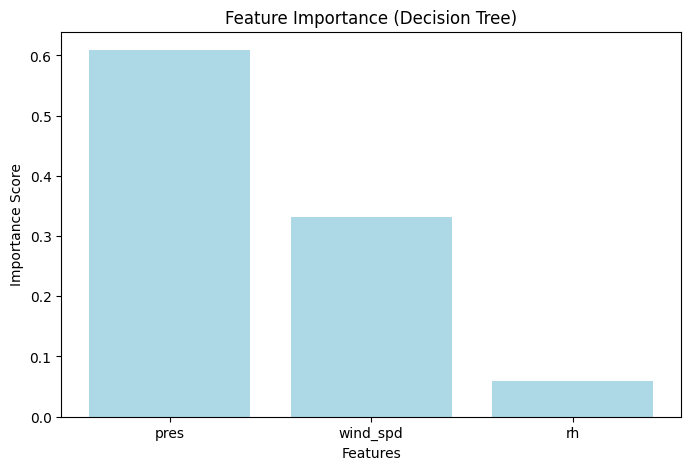

In [30]:
# Plotting Feature Importance for Decision Tree


plt.figure(figsize=(8, 5))

plt.bar(feat_df_dt['Feature'], feat_df_dt['Importance'], color='lightblue')

plt.xlabel("Features")

plt.ylabel("Importance Score")

plt.title("Feature Importance (Decision Tree)")

plt.show()



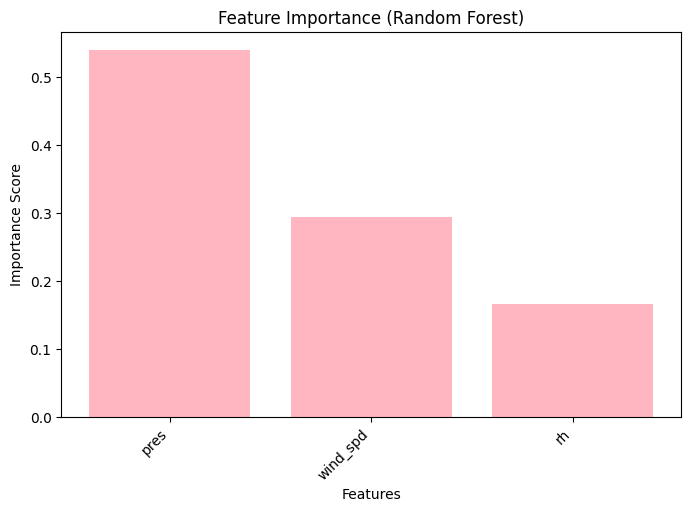

In [31]:
# Plotting Feature Importance for Random Forest


plt.figure(figsize=(8, 5))

plt.bar(feat_df_rf['Feature'], feat_df_rf['Importance'], color='lightpink')

plt.xlabel("Features")

plt.ylabel("Importance Score")

plt.title("Feature Importance (Random Forest)")

plt.show()



**Classification Tasks**

**Predict Weather Condition (Sunny, Cloudy, Rainy, etc.) based on numerical features**

**Train models: Logistic Regression, Random Forest, and SVM**

**Evaluate using Confusion Matrix and F1-score**

In [33]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier



In [36]:
# Defining features 'X' and target 'y'

X = df[['temp', 'rh','wind_spd', 'pres']]

y = df['description(output)']



In [37]:
# Encode the target variable

label_enc = LabelEncoder()

y_encoded = label_enc.fit_transform(y)



In [38]:
# Split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [39]:
# Train the Models


# Logistic Regression Model

lr_model = LogisticRegression(max_iter = 1000)

lr_model.fit(X_train, y_train)


# Random Forest Classifier Model

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_model.fit(X_train, y_train)


# Support Vector Machine (SVM) Model

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear', random_state=42)

In [40]:
# Make predictions on the test set

y_pred_lrm = lr_model.predict(X_test)

y_pred_rfc = rf_model.predict(X_test)

y_pred_svm = svm_model.predict(X_test)



In [41]:
# Evaluate the Models

# 1. Confusion Matrix


cm_lrm = confusion_matrix(y_test, y_pred_lrm)

cm_rfc = confusion_matrix(y_test, y_pred_rfc)

cm_svm = confusion_matrix(y_test, y_pred_svm)


# 2. F1 Score


f1_lrm = f1_score(y_test, y_pred_lrm, average = 'weighted')

f1_rfc = f1_score(y_test, y_pred_rfc, average = 'weighted')

f1_svm = f1_score(y_test, y_pred_svm, average = 'weighted')


# 3. Accuracy Score


acc_lrm = accuracy_score(y_test, y_pred_lrm)

acc_rfc = accuracy_score(y_test, y_pred_rfc)

acc_svm = accuracy_score(y_test, y_pred_svm)



In [44]:
# Print Evaluation Metrics for all models

print(f"\n Logistic Regression : Accuracy : {acc_lrm}        f1 Score : {f1_lrm}")
print(f"\n Random Forest Classifer : Accuracy : {acc_rfc}        f1 Score : {f1_rfc}")
print(f"\n SVM : Accuracy : {acc_svm}        f1 Score : {f1_svm}")




 Logistic Regression : Accuracy : 0.375        f1 Score : 0.369047619047619

 Random Forest Classifer : Accuracy : 0.375        f1 Score : 0.375

 SVM : Accuracy : 0.25        f1 Score : 0.29166666666666663


In [46]:
print(f"\n Confusion Matrix for Logistic Regression : \n {cm_lrm}")

print(f"\n Confusion Matrix for Random Forest Classifer : \n {cm_rfc}")

print(f"\n Confusion Matrix for SVM : \n {cm_svm}")




 Confusion Matrix for Logistic Regression : 
 [[0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [1 0 0 2 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]]

 Confusion Matrix for Random Forest Classifer : 
 [[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [2 0 0 2 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]]

 Confusion Matrix for SVM : 
 [[0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 1 0 0 2]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]]
